In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('coalv2.csv')
df.head()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
0,6.98,33.02,57.42,2.58,5.14,71.80,1.13,18.91,0.44,12312
1,11.15,26.39,58.32,4.14,5.05,66.71,1.40,22.10,0.60,11290
2,2.38,29.88,54.64,13.10,4.66,69.69,1.25,6.07,5.23,12674
3,3.38,28.61,40.39,27.62,4.30,55.02,1.15,6.78,5.13,10130
4,10.67,27.92,54.50,6.91,5.43,70.17,1.54,14.80,1.15,12559


In [3]:
df.describe()

,moistr,volmat,fixedc,ash,hydrgn,carbon,nitrgn,oxygen,sulfur,gcv
count,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000,6582.000000
mean,8.764163,32.193698,48.023200,11.019444,5.301752,65.054637,1.280333,15.446726,1.895128,11544.410817
std,10.615356,6.256164,11.227088,6.008298,0.713242,12.512354,0.343713,11.951921,1.730536,2347.189691
min,0.400000,3.000000,4.100000,0.900000,0.400000,4.650000,0.200000,0.200000,0.070000,2810.000000
25%,2.200000,28.870000,41.800000,6.500000,4.900000,58.312500,1.100000,7.422500,0.670000,10317.250000
50%,3.600000,33.100000,48.400000,9.800000,5.280000,68.020000,1.300000,10.300000,1.200000,12204.500000
75%,10.585000,36.500000,54.947500,14.327500,5.600000,74.300000,1.500000,19.500000,2.730000,13279.000000
max,57.200000,55.700000,87.000000,32.900000,9.500000,89.600000,5.600000,59.900000,17.300000,15247.000000


In [4]:
# selecting features and label
X = df.iloc[:, :-1]  # features
y = df.iloc[:,-1]  #label

In [5]:
[X.shape, y.shape]

[(6582, 9), (6582,)]

## AdaBoost

In [6]:
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import AdaBoostRegressorAdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear',
# ada_boost =  random_state=None)
# ada_boost_score = cross_val_score(ada_boost, X, y, cv=10)
# ada_boost_score.mean()

## Bagging

In [7]:
# from sklearn.ensemble import BaggingRegressor
# bagging = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, 
#                  bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
# bagging_score = cross_val_score(bagging, X, y, cv=10)
# bagging_score.mean()

## Extra Trees

In [8]:
# from sklearn.ensemble import ExtraTreesRegressor
# extra_trees = ExtraTreesRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, 
#             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
#             min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None,
#             random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
# extra_trees_score = cross_val_score(extra_trees, X, y, cv=10)
# extra_trees_score.mean()

## Gradient Boosting 

In [9]:
# from sklearn.ensemble import GradientBoostingRegressor
# gradient_boosting = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
#             criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#             max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None,
#             max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
#             n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
# gradient_boosting_score = cross_val_score(gradient_boosting, X, y, cv=10)
# gradient_boosting_score.mean()

## Random Forest

In [10]:
# from sklearn.ensemble import RandomForestRegressor
# random_forest = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None,
#         min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
#         max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
#         oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
# random_forest_score = cross_val_score(random_forest, X, y, cv=10)
# random_forest_score.mean()

In [21]:
# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the time taking by the models
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

# Selecting the best model using cross-validation from all the ensemble methods
___
## Part-1: 
- Creating a dictionary ("ensemble_models") where all the ensemble methods are stored within a another dictionary

## Part-2:
- All the models are looped through a for loop
- Using cross_val_score run a particular model 10 times and record all r2_score value, then store all the r2_score
- Take average of all the 10 r2_score values

## Part-3:
- For all models, the average r2_score value is stored in a list

In [11]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

# Part-1:
ensemble_models = {
    'ada_boost':{
        'model': AdaBoostRegressor()
    },
    'random_forest': {
        'model': RandomForestRegressor()
    },
    'bagging': {
        'model': BaggingRegressor()
    },
    'extra_trees': {
        'model': ExtraTreesRegressor()
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor()
    }
}


In [20]:
import time
start = time.time()
# enter your code below this line

scores = []
# Part-2, Part-3:
for model_name, mp in ensemble_models.items():
    regressor_score = cross_val_score(mp['model'], X, y, cv=10).mean()
    
    scores.append({
        'model': model_name,
        'averaged_score': regressor_score,
    })
    
# enter you code above this line    
end = time.time()
print('run_time:', convert(end-start), 'h:m:s                                                                                                                                           ')
    
df = pd.DataFrame(scores,columns=['model','averaged_score'])
df


run_time: 0:01:30 h:m:s


,model,averaged_score
0,ada_boost,0.953361
1,random_forest,0.991135
2,bagging,0.990579
3,extra_trees,0.992880
4,gradient_boosting,0.992843


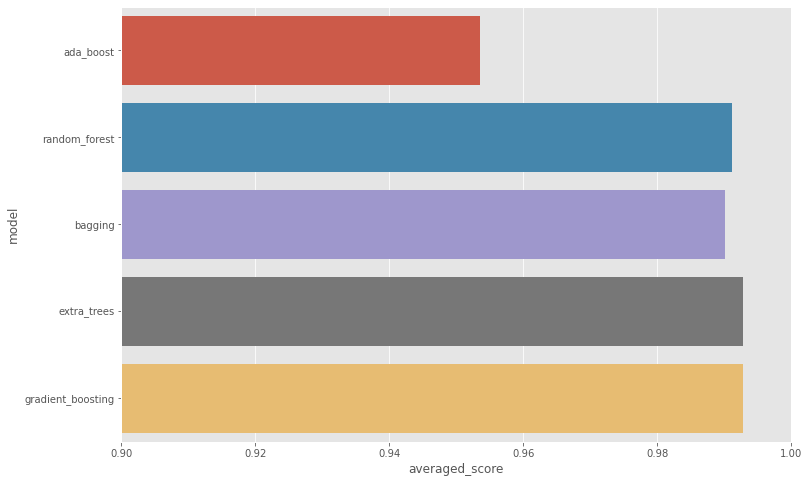

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.barplot(x='averaged_score', y='model', data=df)
plt.xlim(.9, 1)
plt.show()